In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()


Saving output_file.xlsx to output_file.xlsx


In [4]:
df = pd.read_excel('output_file.xlsx')

# 데이터프레임 확인
print(df.info())
print("*"*20)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일자    725 non-null    datetime64[ns]
 1   실적      725 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB
None
********************
        기준일자       실적
0 2023-09-02  3878471
1 2023-09-03  2914458
2 2023-09-04  3536636
3 2023-09-05  3064995
4 2023-09-06  2894640


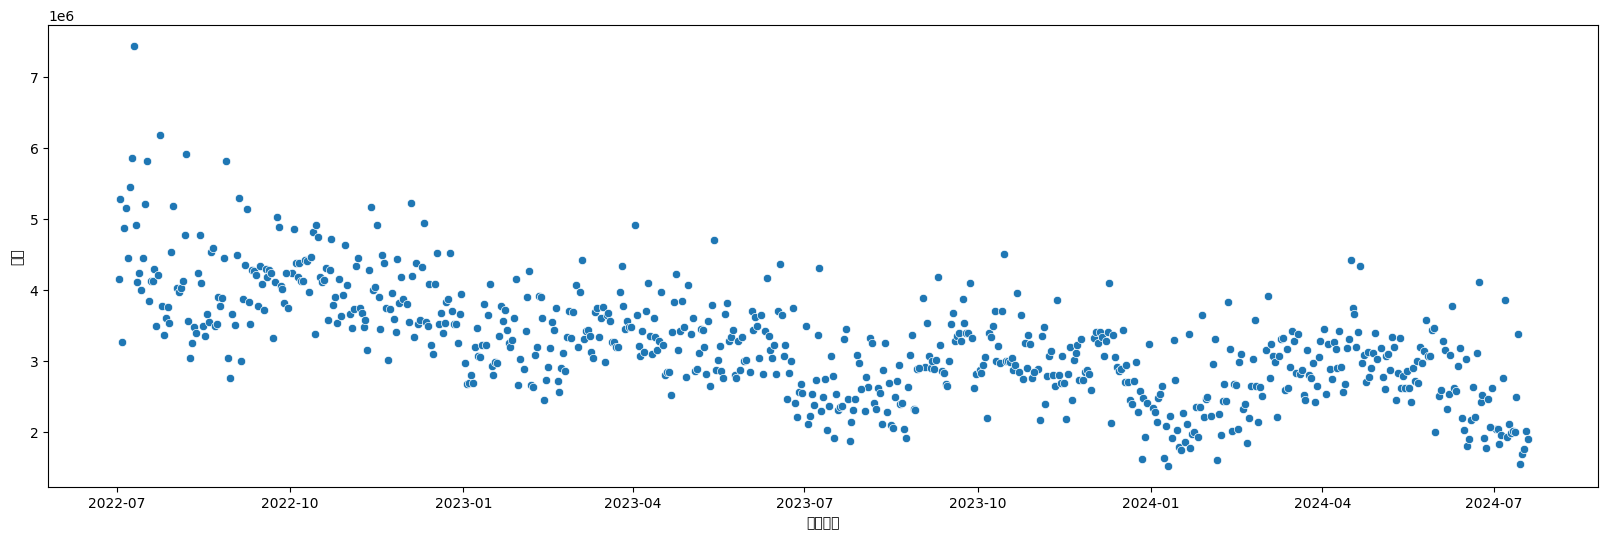

In [9]:
import warnings

# 모든 경고 메시지를 숨김
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

# 그래프 크기 설정 (가로 15, 세로 6)
plt.figure(figsize=(20, 6))

# Scatter plot 생성
sns.scatterplot(x='기준일자', y='실적', data=df)

# 그래프 출력
plt.show()

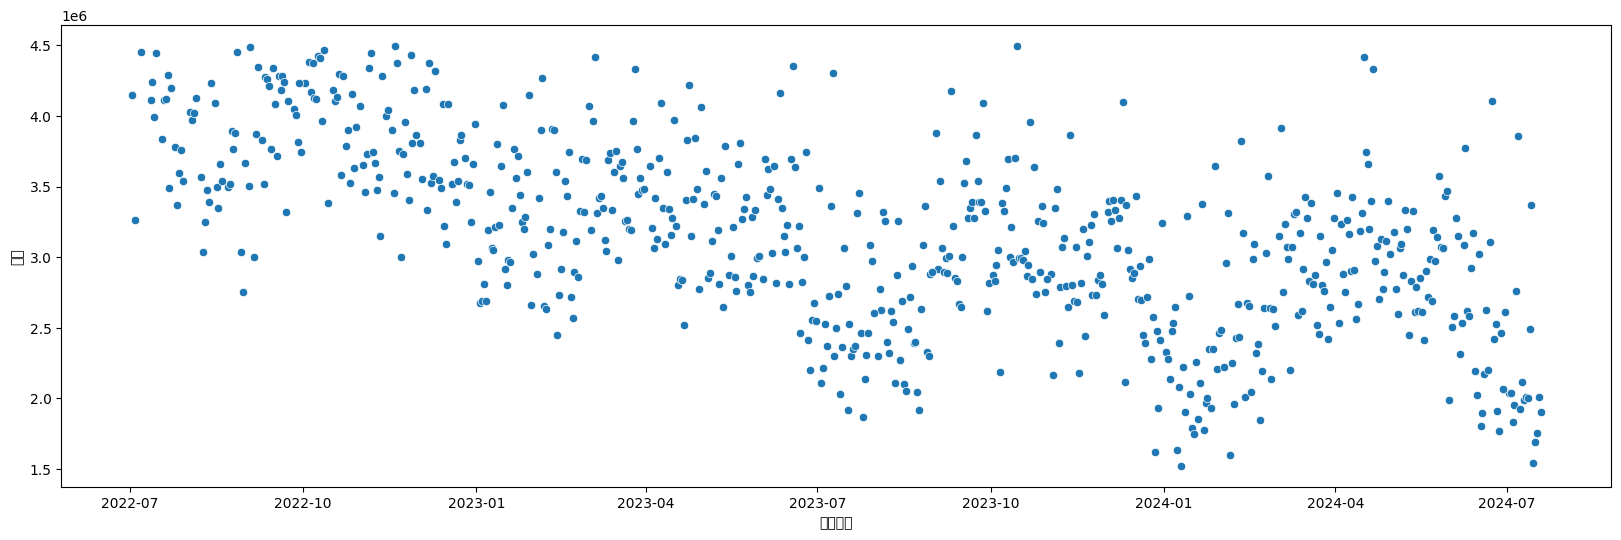

In [14]:


df = df[df['실적'] < 4500000]

# 그래프 크기 설정 (가로 15, 세로 6)
plt.figure(figsize=(20, 6))

# Scatter plot 생성
sns.scatterplot(x='기준일자', y='실적', data=df)

# 그래프 출력
plt.show()


In [23]:
pd.set_option('display.float_format', '{:.0f}'.format)
df['실적'].describe()

,실적
count,689
mean,3140821
std,650037
min,1522821
25%,2691536
50%,3149629
75%,3576972
max,4497363


In [16]:
df['기준일자'] = pd.to_datetime(df['기준일자'])
df['Year'] = df['기준일자'].dt.year
df['Month'] = df['기준일자'].dt.month
df['Day'] = df['기준일자'].dt.day

# 특성과 타겟(매출) 분리
X = df[['Year', 'Month', 'Day']]  # 특성: 연도, 월, 일
y = df['실적']  # 타겟: 매출

# 데이터 분할 (80% 훈련 데이터, 20% 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_model.predict(X_test)

# 모델 성능 평가 (MSE 및 R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2): {r2}')

Mean Squared Error (MSE): 271197579203.26318
R-squared (R^2): 0.34067443840245026


In [17]:
from xgboost import XGBRegressor

# XGBoost 모델 생성 및 학습
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2): {r2}')

Mean Squared Error (MSE): 388854818863.3129
R-squared (R^2): 0.054630492719817125


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Gradient Boosting 모델 생성 및 학습
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = gb_model.predict(X_test)

# 모델 성능 평가 (MSE 및 R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Gradient Boosting - Mean Squared Error (MSE): {mse}')
print(f'Gradient Boosting - R-squared (R^2): {r2}')

Gradient Boosting - Mean Squared Error (MSE): 270785038907.51562
Gradient Boosting - R-squared (R^2): 0.34167739116838003


In [19]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# LightGBM 모델 생성 및 학습
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = lgb_model.predict(X_test)

# 모델 성능 평가 (MSE 및 R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'LightGBM - Mean Squared Error (MSE): {mse}')
print(f'LightGBM - R-squared (R^2): {r2}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 620, number of used features: 3
[LightGBM] [Info] Start training from score 3145437.662903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain